# Project1 - Group 4 - Part 1: Exploratory Data Analysis

In [2]:
# Import libraries
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')


# 2014 UberData -file paths & read csv

# Path to 2014 Uber CSV file 
Uber_trips_apr14 = Path("data/kaggle_csv/uber-raw-data-2014/uber-raw-data-apr14.csv")
Uber_trips_may14 = Path("data/kaggle_csv/uber-raw-data-2014/uber-raw-data-may14.csv")
Uber_trips_jun14 = Path("data/kaggle_csv/uber-raw-data-2014/uber-raw-data-jun14.csv")
Uber_trips_jul14 = Path("data/kaggle_csv/uber-raw-data-2014/uber-raw-data-jul14.csv")
Uber_trips_aug14 = Path("data/kaggle_csv/uber-raw-data-2014/uber-raw-data-aug14.csv")
Uber_trips_sep14 = Path("data/kaggle_csv/uber-raw-data-2014/uber-raw-data-sep14.csv")


# Read all Uber CSV file into DataFrame
df_apr14 = pd.read_csv(Uber_trips_apr14)
df_may14 = pd.read_csv(Uber_trips_may14)
df_jun14 = pd.read_csv(Uber_trips_jun14)
df_jul14 = pd.read_csv(Uber_trips_jul14)
df_aug14 = pd.read_csv(Uber_trips_aug14)
df_sep14 = pd.read_csv(Uber_trips_sep14)

# check uber dataaframe structure using one csv file
df_apr14.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
# 2014 Weather data -file paths & read csv - Use merged CSV file 

# Path to 2014 weather CSV file

NOAA_Meged_weather_2014 = Path("data/combined/weather-combined-data-metric-2014.csv")

# Read all weather CSV file into DataFrame
Weather_df = pd.read_csv(NOAA_Meged_weather_2014)

# check uber dataaframe structure
Weather_df.head()

,Date,MaxTemp_degC,MinTemp_degC,Precipitation_mm
0,2014-04-01,15.556,3.889,0.000
1,2014-04-02,12.222,5.556,0.000
2,2014-04-03,19.444,7.778,1.778
3,2014-04-04,8.333,4.444,5.334
4,2014-04-05,12.222,4.444,0.000


# Cleaning Uber data: Concatenate, Check missing value, Duplicates and remove if any.

In [3]:
# Concatenate all Uber data DataFrames into one

Uber_combined_df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

Uber_combined_df.head()


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
# check the tail of the data to makesure concaternation worked
Uber_combined_df.tail()

,Date/Time,Lat,Lon,Base
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764
4534326,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [5]:
# Count the number of rows in Uber_combined_df
num_rows = len(Uber_combined_df)
print("Number of rows in Uber_combined_df:", num_rows)

Number of rows in Uber_combined_df: 4534327


In [6]:
# Check for missing Uber data
missing_data = Uber_combined_df.isnull()

# Summarize missing data counts
missing_counts = missing_data.sum()

# Print
print("Missing data counts:")
print(missing_counts)

Missing data counts:
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [7]:
# Check for duplicates in Uber data
duplicates = Uber_combined_df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print or use num_duplicates as needed
print("Number of duplicate rows in Uber_combined_df:", num_duplicates)


Number of duplicate rows in Uber_combined_df: 82581


In [8]:
# Remove duplicates

Uber_combined_cleaned_df = Uber_combined_df.drop_duplicates()

# Print the shape to see how many rows are left after removing duplicates
print("Shape of cleaned DataFrame:", Uber_combined_cleaned_df.shape)




Shape of cleaned DataFrame: (4451746, 4)


In [9]:
Uber_combined_cleaned_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Cleaning and formating the Weather data

In [10]:
Weather_df.head()

,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in)
0,2014,4,1,60,39,0.00,0,0
1,2014,4,2,54,42,0.00,0,0
2,2014,4,3,67,46,0.07,0,0
3,2014,4,4,47,40,0.21,0,0
4,2014,4,5,54,40,0.00,0,0


In [11]:
# Check for missing data
missing_data = Weather_df.isnull()

# Summarize missing data counts
missing_counts = missing_data.sum()

# Print or use missing_counts as needed
print("Missing data counts:")
print(missing_counts)

Missing data counts:
Year                                     0
Month                                    0
Day                                      0
MaxTemp_(degF)                           0
MinTemp_(degF)                           0
Rain_MeltedSnow_Etc_(in)                 0
Snow_IcePellets_Hail_(in)                0
Snow_IcePellets_Hail_IceOnGround_(in)    0
dtype: int64


In [12]:
# Convert MaxTemp_(degF) and MinTemp_(degF) columns to Celsius and round to 2 decimal places
Weather_df['MaxTemp_(degC)'] = ((Weather_df['MaxTemp_(degF)'] - 32) * 5.0/9.0).round(2)
Weather_df['MinTemp_(degC)'] = ((Weather_df['MinTemp_(degF)'] - 32) * 5.0/9.0).round(2)

# Create a Date column from year, month, and day columns to match  Uber data. This step is done to merge two dataframe  
Weather_df['Date'] = pd.to_datetime(Weather_df[['Year', 'Month', 'Day']]).dt.strftime('%-d/%-m/%Y')

Weather_df.head()


,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in),MaxTemp_(degC),MinTemp_(degC),Date
0,2014,4,1,60,39,0.00,0,0,15.56,3.89,2014-04-01 00:00:00
1,2014,4,2,54,42,0.00,0,0,12.22,5.56,2014-04-02 00:00:00
2,2014,4,3,67,46,0.07,0,0,19.44,7.78,2014-04-03 00:00:00
3,2014,4,4,47,40,0.21,0,0,8.33,4.44,2014-04-04 00:00:00
4,2014,4,5,54,40,0.00,0,0,12.22,4.44,2014-04-05 00:00:00


# Merge both Uber and Weather data 

In [13]:
# Convert the 'Date/Time' column to datetime format
Uber_combined_cleaned_df['Date/Time'] = pd.to_datetime(Uber_combined_cleaned_df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

# Extract the date part from the 'Date/Time' column
Uber_combined_cleaned_df['Date'] = Uber_combined_cleaned_df['Date/Time'].dt.date

# Convert the 'Date' column back to datetime format to ensure consistency
Uber_combined_cleaned_df['Date'] = pd.to_datetime(Uber_combined_cleaned_df['Date'])

# Convert the 'Date' column in Weather_df to datetime format
Weather_df['Date'] = pd.to_datetime(Weather_df['Date'], format='%Y-%m-%d %H:%M:%S')

# Merge the Uber data with the Weather data on the 'Date' column
Uber_Weather_merged_data = pd.merge(Uber_combined_cleaned_df, Weather_df, on='Date', how='left')

# Display the first few rows of the merged DataFrame
Uber_Weather_merged_data.head()


,Date/Time,Lat,Lon,Base,Date,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in),MaxTemp_(degC),MinTemp_(degC)
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89


In [14]:
# Define the path to save the CSV file
file_path = 'raw_data/Uber_Weather_merged_data.csv'

# Save the DataFrame to a CSV file
Uber_Weather_merged_data.to_csv(file_path, index=False)

print(f'DataFrame saved to {file_path}')

DataFrame saved to raw_data/Uber_Weather_merged_data.csv


In [15]:
Uber_Weather_merged_data.tail()

,Date/Time,Lat,Lon,Base,Date,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in),MaxTemp_(degC),MinTemp_(degC)
4451741,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67
4451742,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67
4451743,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67
4451744,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67
4451745,2014-09-30 22:58:00,40.7140,-73.9496,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67


In [16]:
# Count the number of rows in cross check the number of rows

num_rows = len(Uber_Weather_merged_data)

print("Number of rows in Uber_Weather_merged_data:", num_rows)

Number of rows in Uber_Weather_merged_data: 4451746


# Plot Graphs & Analyse

In [17]:
# Ride counts - Group by date
daily_rides = Uber_Weather_merged_data.groupby('Date')['Base'].count()
print("Daily Rides:\n", daily_rides)

Daily Rides:
 Date
2014-04-01    14376
2014-04-02    17230
2014-04-03    20482
2014-04-04    26353
2014-04-05    19273
              ...  
2014-09-26    36538
2014-09-27    38424
2014-09-28    28924
2014-09-29    28478
2014-09-30    32593
Name: Base, Length: 183, dtype: int64


# Weather affects Uber rides based on different temperature ranges

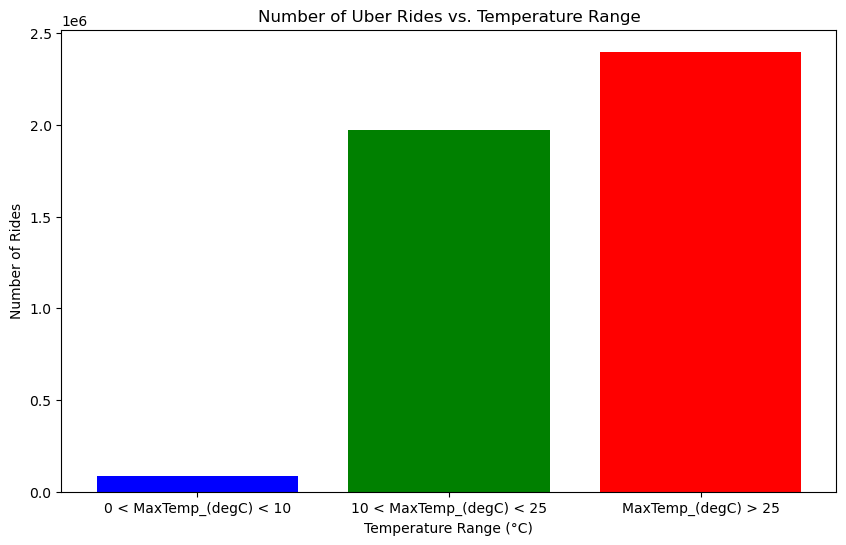

In [19]:
# Define the temperature ranges
temp_ranges = {
    '0 < MaxTemp_(degC) < 10': (0, 10),
    '10 < MaxTemp_(degC) < 25': (10, 25),
    'MaxTemp_(degC) > 25': (25, float('inf'))
}

# Initialize a dictionary to store the number of rides for each range
rides_count = {key: 0 for key in temp_ranges}

# Count the number of rides for each temperature range
for key, (low, high) in temp_ranges.items():
    rides_count[key] = Uber_Weather_merged_data[
        (Uber_Weather_merged_data['MaxTemp_(degC)'] > low) & 
        (Uber_Weather_merged_data['MaxTemp_(degC)'] <= high)
    ].shape[0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(rides_count.keys(), rides_count.values(), color=['blue', 'green', 'red'])
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Number of Rides')
plt.title('Number of Uber Rides vs. Temperature Range')
plt.show()

In [20]:
# Dictionary with temperature range counts
temperature_counts = {
    '0 < MaxTemp_(degC) < 10': 82346,
    '10 < MaxTemp_(degC) < 25': 1969969,
    'MaxTemp_(degC) > 25': 2399431
}

# Convert dictionary to DataFrame
temperature_df = pd.DataFrame(list(temperature_counts.items()), columns=['Temperature Range', 'Count'])

# Display the DataFrame
print(temperature_df)

          Temperature Range    Count
0   0 < MaxTemp_(degC) < 10    82346
1  10 < MaxTemp_(degC) < 25  1969969
2       MaxTemp_(degC) > 25  2399431


# The impact of rain on Uber rides

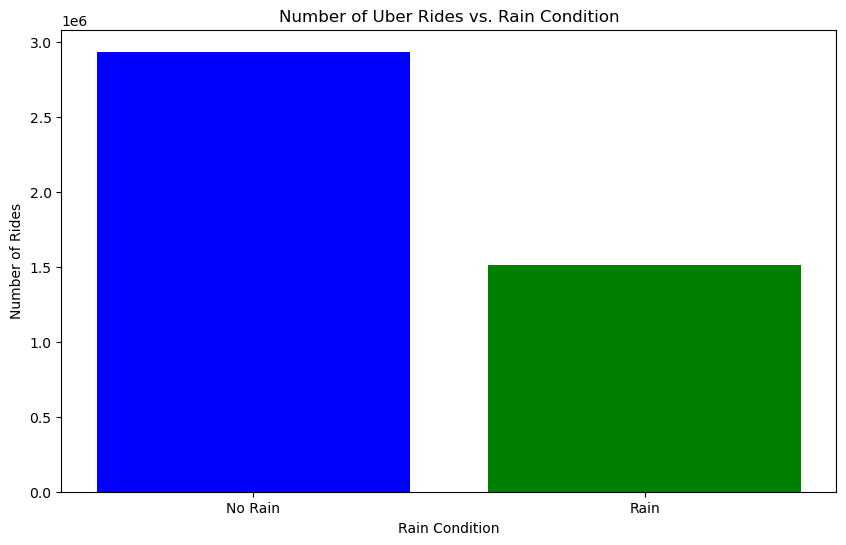

In [21]:
# Define the ranges for rain (0 for no rain, >0 for rain)
rain_ranges = {
    'No Rain': Uber_Weather_merged_data[Uber_Weather_merged_data['Rain_MeltedSnow_Etc_(in)'] == 0].shape[0],
    'Rain': Uber_Weather_merged_data[Uber_Weather_merged_data['Rain_MeltedSnow_Etc_(in)'] > 0].shape[0]
}

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(rain_ranges.keys(), rain_ranges.values(), color=['blue', 'green'])
plt.xlabel('Rain Condition')
plt.ylabel('Number of Rides')
plt.title('Number of Uber Rides vs. Rain Condition')
plt.show()

# The impact of snow on Uber rides

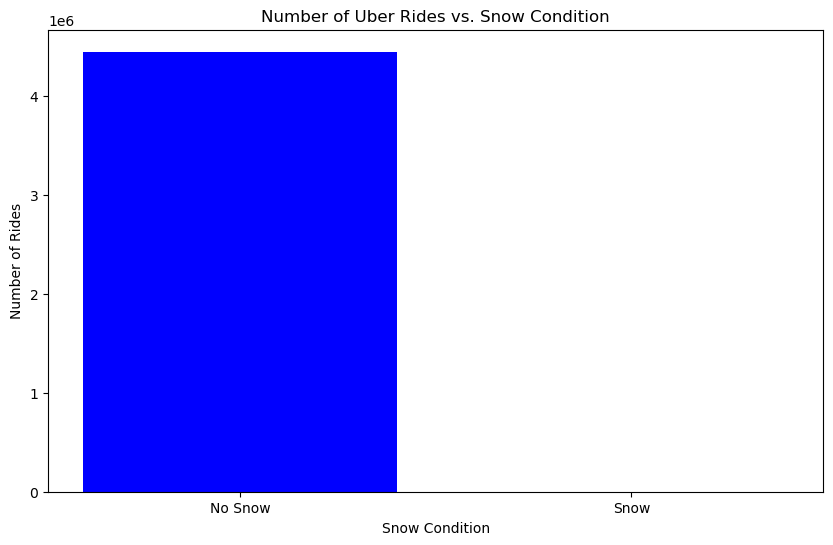

In [22]:
# Define the ranges for snow (0 for no snow, >0 for snow)
snow_ranges = {
    'No Snow': Uber_Weather_merged_data[Uber_Weather_merged_data['Snow_IcePellets_Hail_(in)'] == 0].shape[0],
    'Snow': Uber_Weather_merged_data[Uber_Weather_merged_data['Snow_IcePellets_Hail_(in)'] > 0].shape[0]
}

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(snow_ranges.keys(), snow_ranges.values(), color=['blue', 'gray'])
plt.xlabel('Snow Condition')
plt.ylabel('Number of Rides')
plt.title('Number of Uber Rides vs. Snow Condition')
plt.show()

# Line Plot of Daily Rides Over Time

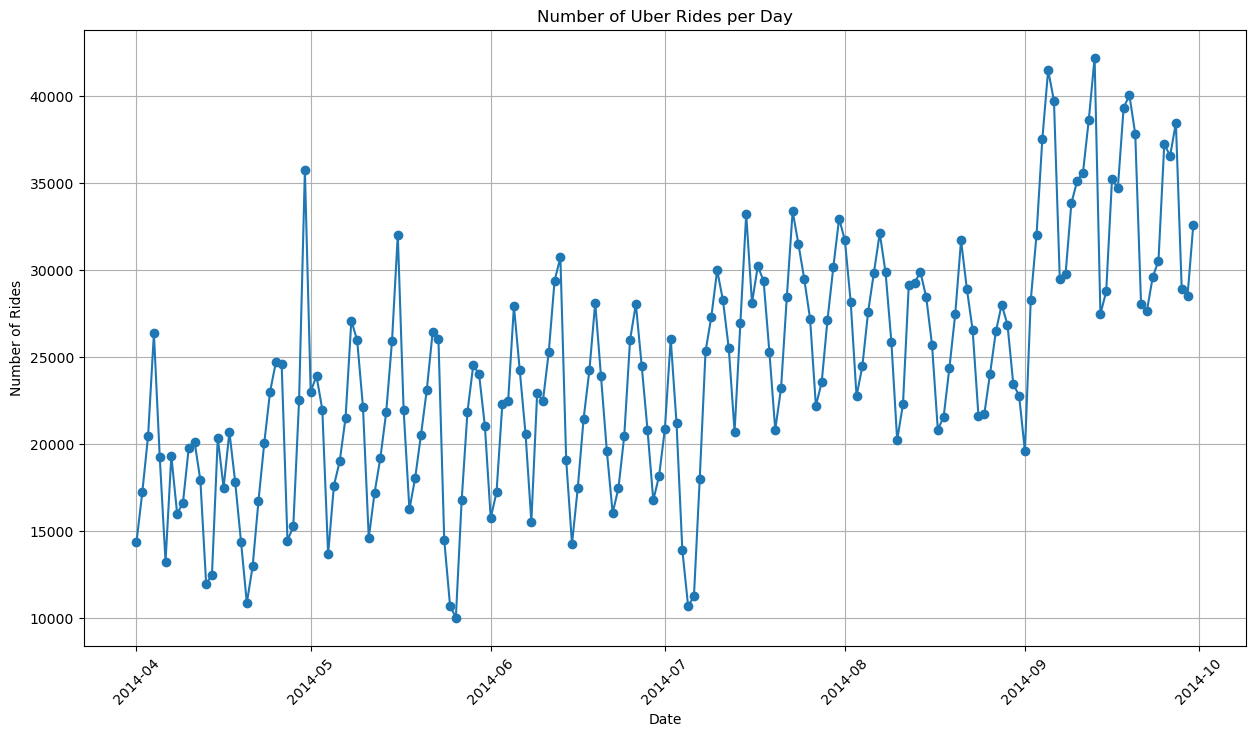

In [23]:
# Convert 'Date' column to datetime if not already in datetime format
Uber_Weather_merged_data['Date'] = pd.to_datetime(Uber_Weather_merged_data['Date'])

# Group the data by 'Date' and count the number of rides per day
daily_rides = Uber_Weather_merged_data.groupby('Date').size().reset_index(name='Number of Rides')

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(daily_rides['Date'], daily_rides['Number of Rides'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Uber Rides per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar Plot of Rides by Month

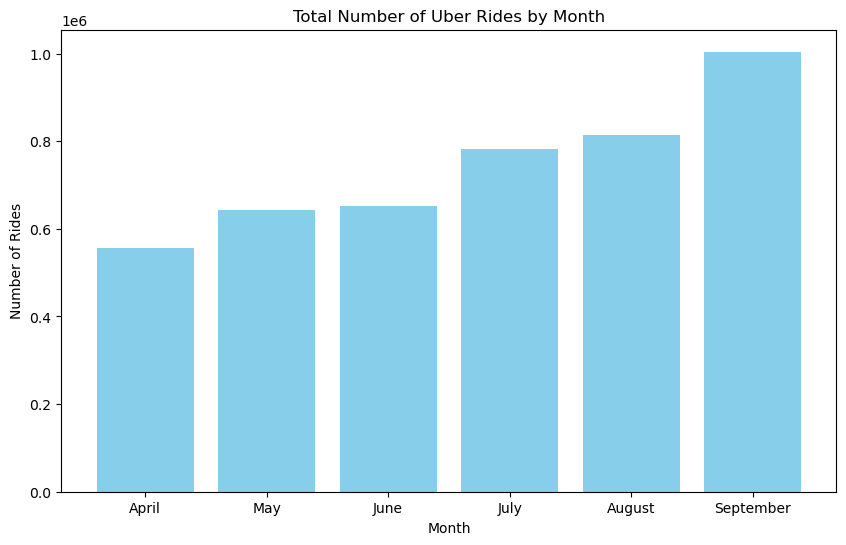

In [24]:
# Group by month and count rides
monthly_rides = Uber_Weather_merged_data.groupby(Uber_Weather_merged_data['Date'].dt.month).size().reset_index(name='Number of Rides')
monthly_rides['Month'] = monthly_rides['Date'].map({4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September'})

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_rides['Month'], monthly_rides['Number of Rides'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Total Number of Uber Rides by Month')
plt.show()

Average number of rides on weekdays (Monday to Thursday): 652215.50
Number of rides on Fridays: 727532


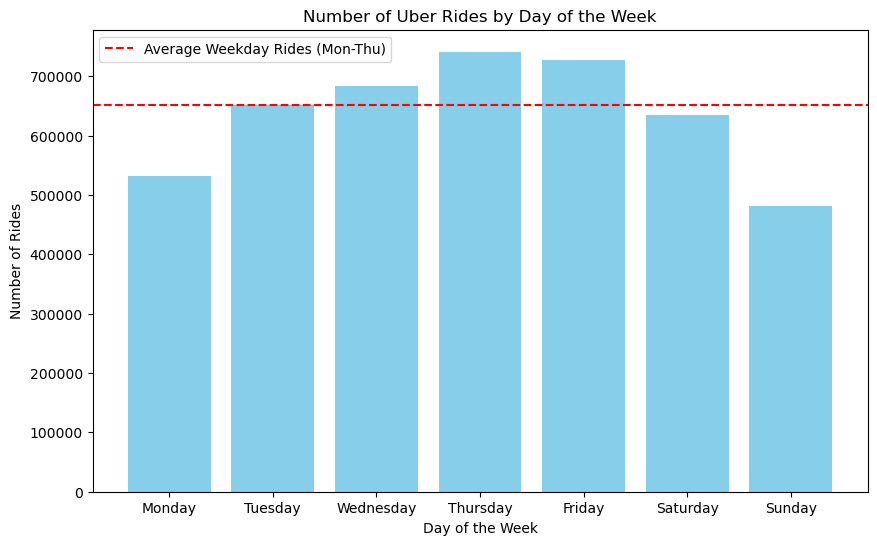

In [25]:
# Convert 'Date' column to datetime if not already in datetime format
Uber_Weather_merged_data['Date'] = pd.to_datetime(Uber_Weather_merged_data['Date'])

# Add a new column for the day of the week
Uber_Weather_merged_data['DayOfWeek'] = Uber_Weather_merged_data['Date'].dt.day_name()

# Group the data by 'DayOfWeek' and count the number of rides
rides_by_dayofweek = Uber_Weather_merged_data.groupby('DayOfWeek').size().reset_index(name='Number of Rides')

# Sort the days of the week for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_by_dayofweek['DayOfWeek'] = pd.Categorical(rides_by_dayofweek['DayOfWeek'], categories=days_order, ordered=True)
rides_by_dayofweek = rides_by_dayofweek.sort_values('DayOfWeek')

# Calculate the average number of rides on weekdays (Monday to Thursday)
average_weekday_rides = rides_by_dayofweek[rides_by_dayofweek['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])]['Number of Rides'].mean()

# Extract the number of rides on Fridays
friday_rides = rides_by_dayofweek[rides_by_dayofweek['DayOfWeek'] == 'Friday']['Number of Rides'].values[0]

# Print the results
print(f'Average number of rides on weekdays (Monday to Thursday): {average_weekday_rides:.2f}')
print(f'Number of rides on Fridays: {friday_rides}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(rides_by_dayofweek['DayOfWeek'], rides_by_dayofweek['Number of Rides'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Number of Uber Rides by Day of the Week')
plt.axhline(y=average_weekday_rides, color='red', linestyle='--', label='Average Weekday Rides (Mon-Thu)')
plt.legend()
plt.show()

# The relationship between average temperature (MaxTemp_(degC)) and the count of Uber rides

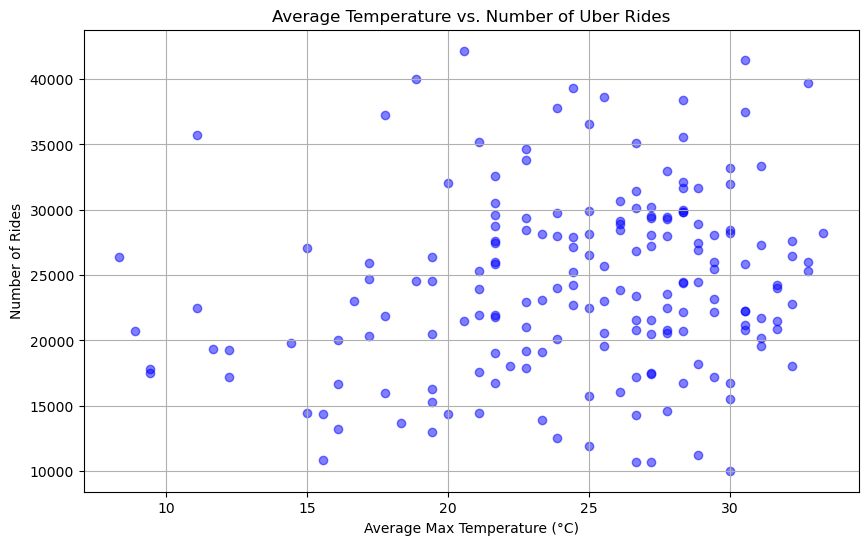

In [27]:
# Group by date and calculate average temperature and count of rides
rides_by_date = Uber_Weather_merged_data.groupby('Date').agg({
    'MaxTemp_(degC)': 'mean',
    'Date/Time': 'count'  # Assuming 'Date/Time' is a column representing each ride
}).reset_index()

# Rename columns for clarity
rides_by_date.rename(columns={'Date/Time': 'Number of Rides'}, inplace=True)

# Scatter plot of rides vs. average temperature
plt.figure(figsize=(10, 6))
plt.scatter(rides_by_date['MaxTemp_(degC)'], rides_by_date['Number of Rides'], color='blue', alpha=0.5)
plt.xlabel('Average Max Temperature (°C)')
plt.ylabel('Number of Rides')
plt.title('Average Temperature vs. Number of Uber Rides')
plt.grid(True)
plt.show()

In [28]:
# Group by 'Date' and calculate ride counts and maximum temperature for each date
ride_counts_with_temp = Uber_Weather_merged_data.groupby('Date').agg({
    'MaxTemp_(degC)': 'max',  # Assuming you want the maximum temperature for each date
    'Date': 'size'  # Count the number of rows (rides) for each date
}).rename(columns={'Date': 'Ride_Count'}).reset_index()

# Display the first few rows to check
print(ride_counts_with_temp.head())

        Date  MaxTemp_(degC)  Ride_Count
0 2014-04-01           15.56       14376
1 2014-04-02           12.22       17230
2 2014-04-03           19.44       20482
3 2014-04-04            8.33       26353
4 2014-04-05           12.22       19273


# Descriptive Statistics

In [29]:
# Summary statistics
summary_stats = ride_counts_with_temp[['MaxTemp_(degC)', 'Ride_Count']].describe()
print(summary_stats)

       MaxTemp_(degC)    Ride_Count
count      183.000000    183.000000
mean        24.602350  24326.480874
std          5.462703   6865.004832
min          8.330000  10031.000000
25%         21.670000  19692.500000
50%         25.560000  24045.000000
75%         28.330000  28618.500000
max         33.330000  42169.000000


# Correlation Analysis

In [31]:
# Correlation matrix
correlation_matrix = ride_counts_with_temp[['MaxTemp_(degC)', 'Ride_Count']].corr()
print(correlation_matrix)

                MaxTemp_(degC)  Ride_Count
MaxTemp_(degC)        1.000000    0.181101
Ride_Count            0.181101    1.000000


# Histogram of Temperature

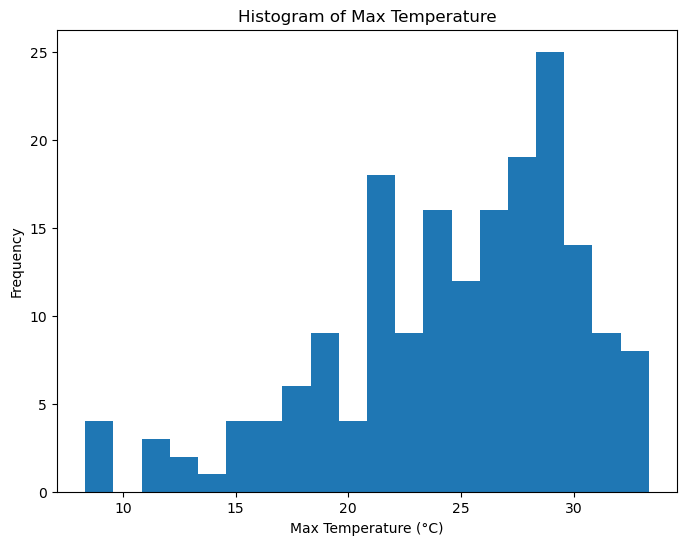

In [56]:
# Histogram of temperature
plt.figure(figsize=(8, 6))
plt.hist(ride_counts_with_temp['MaxTemp_(degC)'], bins=20, edgecolor=None)
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Max Temperature')
plt.show()

# Time Series Analysis (Example: Weekly Trends)

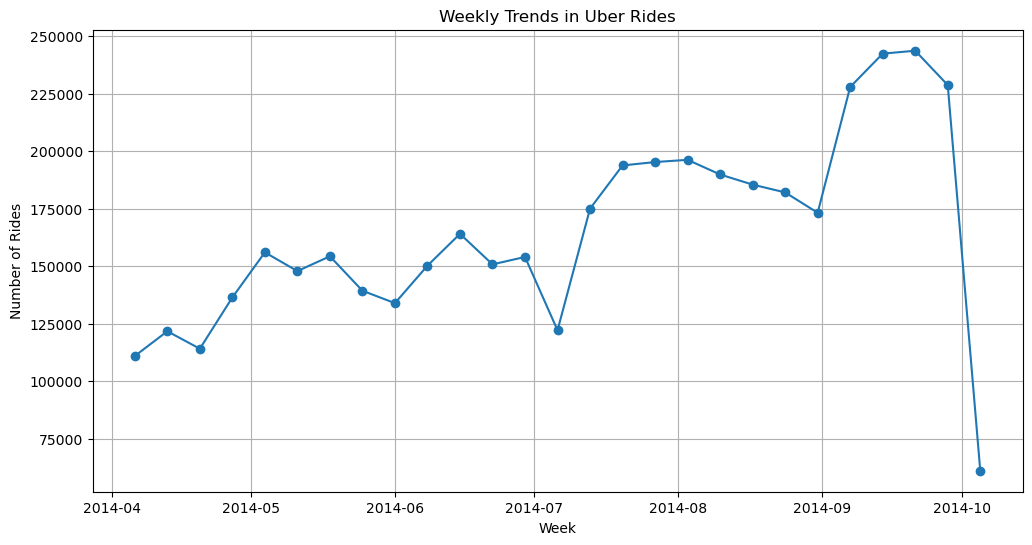

In [33]:
# Group by week and calculate average rides
weekly_rides = Uber_Weather_merged_data.resample('W', on='Date').size()
plt.figure(figsize=(12, 6))
plt.plot(weekly_rides.index, weekly_rides.values, marker='o')
plt.xlabel('Week')
plt.ylabel('Number of Rides')
plt.title('Weekly Trends in Uber Rides')
plt.grid(True)
plt.show()

In [46]:
# Assuming Uber_Weather_merged_data is your full DataFrame
sample_size = 10000

# Select a random sample of 10,000 rides
sampled_data = Uber_Weather_merged_data.sample(n=sample_size, random_state=1)

# Display the sample
print(sampled_data)

# Continue with your analysis on the sampled data
# For example, grouping by 'Month' and counting the number of rides in the sample
ride_counts_by_month_sampled = sampled_data.groupby('Month').size().reset_index(name='Number of Rides')

# Display the result
print(ride_counts_by_month_sampled)

                  Date/Time      Lat      Lon    Base       Date  Year  Month  \
3684430 2014-09-26 08:49:00  40.7645 -73.9244  B02598 2014-09-26  2014      9   
1689258 2014-06-06 19:20:00  40.7578 -73.9763  B02682 2014-06-06  2014      6   
1640629 2014-06-29 02:48:00  40.7833 -73.9527  B02617 2014-06-29  2014      6   
2521298 2014-07-16 07:51:00  40.7369 -73.9804  B02682 2014-07-16  2014      7   
3185774 2014-08-27 19:06:00  40.7401 -73.9949  B02617 2014-08-27  2014      8   
...                     ...      ...      ...     ...        ...   ...    ...   
1624698 2014-06-26 22:25:00  40.6443 -73.7834  B02617 2014-06-26  2014      6   
2979646 2014-08-08 21:40:00  40.7217 -73.9992  B02617 2014-08-08  2014      8   
68911   2014-04-07 20:25:00  40.7167 -74.0085  B02598 2014-04-07  2014      4   
4097851 2014-09-03 12:27:00  40.6975 -73.9932  B02682 2014-09-03  2014      9   
2171947 2014-07-08 07:43:00  40.7368 -73.9728  B02617 2014-07-08  2014      7   

         Day  MaxTemp_(degF

In [47]:
# Group by 'Month' and count the number of rides
ride_counts_by_month = sampled_data.groupby('Month').size().reset_index(name='Number of Rides')

# Display the result
print(ride_counts_by_month)

   Month  Number of Rides
0      4             1241
1      5             1422
2      6             1454
3      7             1744
4      8             1838
5      9             2301


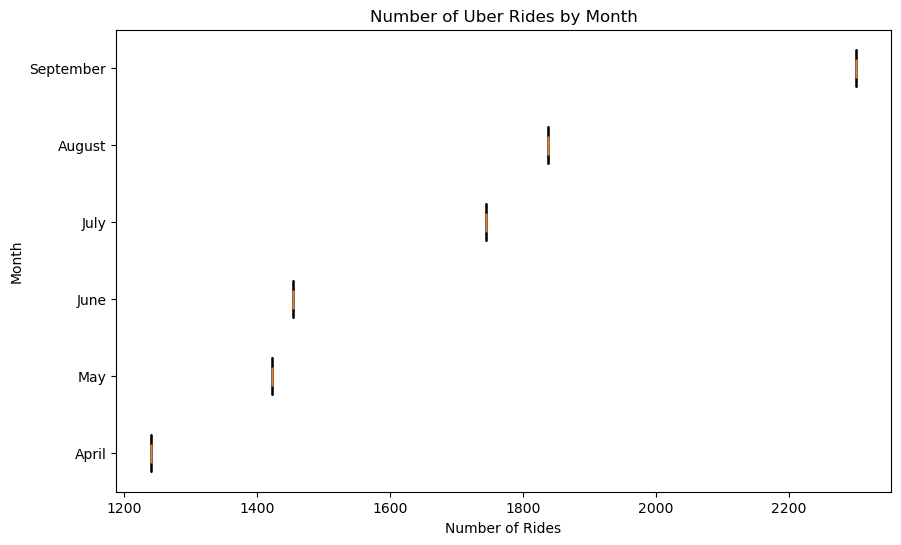

In [51]:
# Define the data for the box plot
months = ['April', 'May', 'June', 'July', 'August', 'September']
ride_counts = [
    [1241],  # April
    [1422],  # May
    [1454],  # June
    [1744],  # July
    [1838],  # August
    [2301]   # September
]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(ride_counts, labels=months, patch_artist=True, notch=True, vert=False)

# Add labels and title
plt.xlabel('Number of Rides')
plt.ylabel('Month')
plt.title('Number of Uber Rides by Month')

# Show plot
plt.show()

In [44]:
# Display the first few rows to check
rides_by_dayofweek_df = pd.DataFrame(rides_by_dayofweek)
print(rides_by_dayofweek_df.head())

  DayOfWeek  Number of Rides
0    Friday           727532
1    Monday           532133
2  Saturday           634194
3    Sunday           481158
4  Thursday           741372


In [54]:
# Perform ANOVA
f_stat, p_value = stats.f_oneway(
    rides_by_dayofweek_df[rides_by_dayofweek_df['DayOfWeek'] == 'Friday']['Number of Rides'],
    rides_by_dayofweek_df[rides_by_dayofweek_df['DayOfWeek'] == 'Monday']['Number of Rides'],
    rides_by_dayofweek_df[rides_by_dayofweek_df['DayOfWeek'] == 'Saturday']['Number of Rides'],
    rides_by_dayofweek_df[rides_by_dayofweek_df['DayOfWeek'] == 'Sunday']['Number of Rides'],
    rides_by_dayofweek_df[rides_by_dayofweek_df['DayOfWeek'] == 'Thursday']['Number of Rides']
)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: nan
P-value: nan
